<a href="https://colab.research.google.com/github/JoshuaThadi/DataScienceEcosystem/blob/main/DataVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Visualization with python - Assignment

In [ ]:
# importing libraries
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

###Importing data

In [ ]:
import requests
import io
import pandas as pd

# URL of the CSV file
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"

# Fetch the data from the URL
response = requests.get(URL)

# Raise an error if the request failed
response.raise_for_status()

# Convert the response content into a readable format for pandas
csv_content = io.StringIO(response.text)

# Read the CSV data into a pandas dataframe
df = pd.read_csv(csv_content)

# Print confirmation
print('Data downloaded and read into a dataframe!')

# Optional: Show the first few rows of the dataframe
print(df.head())


Data downloaded and read into a dataframe!
        Date  Year Month  Recession  Consumer_Confidence  Seasonality_Weight  \
0  1/31/1980  1980   Jan          1               108.24                0.50   
1  2/29/1980  1980   Feb          1                98.75                0.75   
2  3/31/1980  1980   Mar          1               107.48                0.20   
3  4/30/1980  1980   Apr          1               115.01                1.00   
4  5/31/1980  1980   May          1                98.72                0.20   

       Price  Advertising_Expenditure  Competition     GDP  Growth_Rate  \
0  27483.571                     1558            7  60.223     0.010000   
1  24308.678                     3048            4  45.986    -0.309594   
2  28238.443                     3137            3  35.141    -0.308614   
3  32615.149                     1653            7  45.673     0.230596   
4  23829.233                     1319            4  52.997     0.138197   

   unemployment_rate  Aut

###Task 1.1 - Develop a Line plot using the functionality of pandas to show how automobile sales fluctuate from year to year.

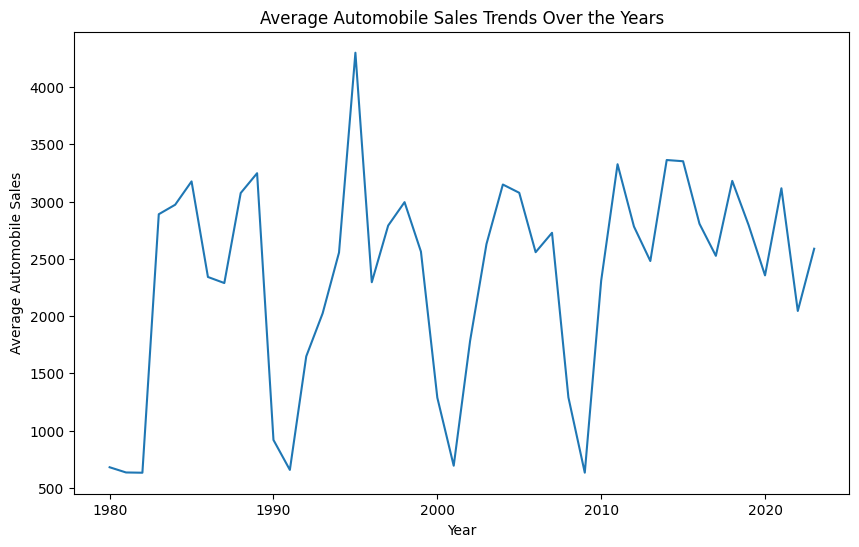

In [ ]:
df_line = df.groupby(df['Year'])['Automobile_Sales'].mean()
plt.figure(figsize=(10, 6))
df_line.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Average Automobile Sales Trends Over the Years')
plt.show()

### Include the following on the plot
ticks on x- axis with all the years, to identify the years of recession
<br>annotation for at least two years of recession
<br>Title as Automobile Sales during Recession
<br>


Text(1997, 40000, 'Recession 2000-2001')

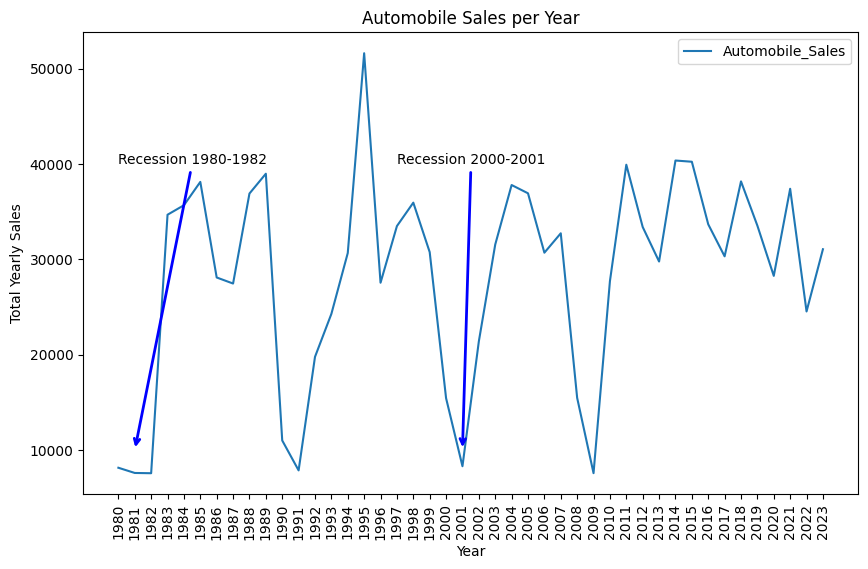

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

ax.set_xticks(df["Year"].unique())

df[["Year", "Automobile_Sales"]].groupby("Year").sum().reset_index().plot(
    kind="line",
    x="Year",
    y="Automobile_Sales",
    title="Automobile Sales per Year",
    ylabel="Total Yearly Sales",
    ax=ax,
    rot=90,
)
ax.annotate(
    "Recession 1980-1982",
    xy=(1981, 10000),
    xytext=(1980, 40000),
    xycoords="data",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="blue", lw=2),
)

ax.annotate(
    "Recession 2000-2001",
    xy=(2001, 10000),
    xytext=(1997, 40000),
    xycoords="data",
    arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color="blue", lw=2),
)

###TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

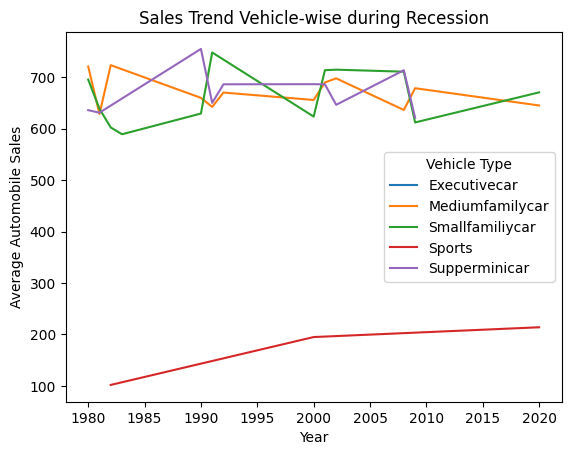

In [ ]:
df_rec = df[df['Recession'] == 1]
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()
df_Mline.set_index('Year', inplace=True)
df_Mline = df_Mline.groupby(['Vehicle_Type'])['Automobile_Sales']
df_Mline.plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Average Automobile Sales')
plt.title('Sales Trend Vehicle-wise during Recession')
plt.legend(title='Vehicle Type')
plt.show()


###TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

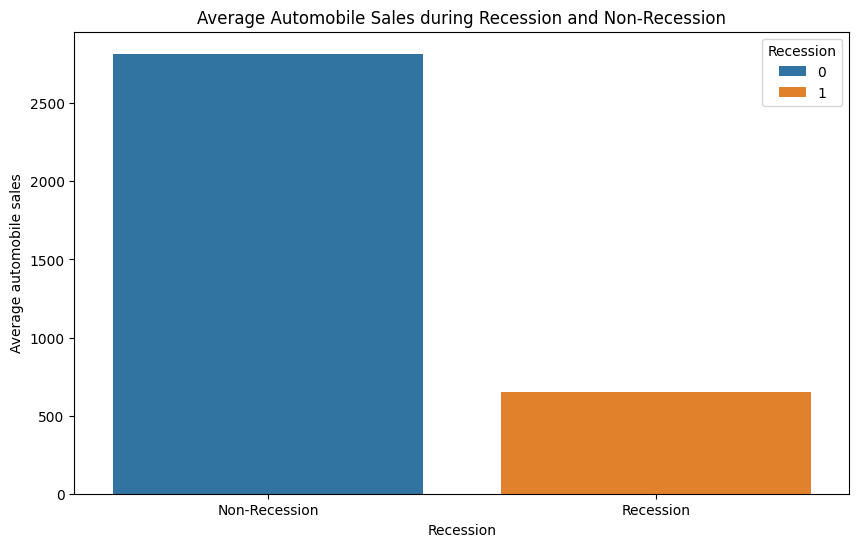

In [ ]:
new_df = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()
# Create the bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession',  data=new_df)
plt.xlabel('Recession')
plt.ylabel('Average automobile sales')
plt.title('Average Automobile Sales during Recession and Non-Recession')
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.show()

###Now you want to compare the sales of different vehicle types during a recession and a non-recession period

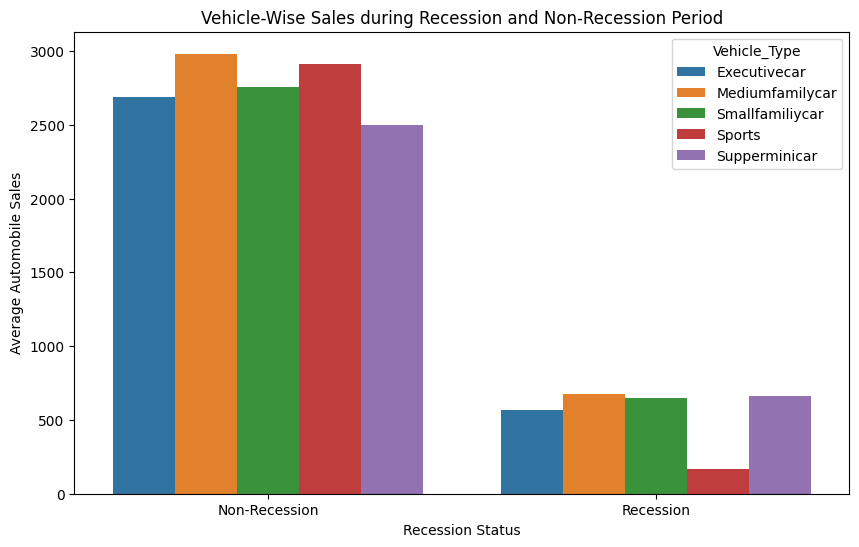

In [ ]:
recession_data = df[df['Recession'] == 1]
dd = df.groupby(['Recession', 'Vehicle_Type'])['Automobile_Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Recession Status')
plt.ylabel('Average Automobile Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')
plt.show()

###TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.

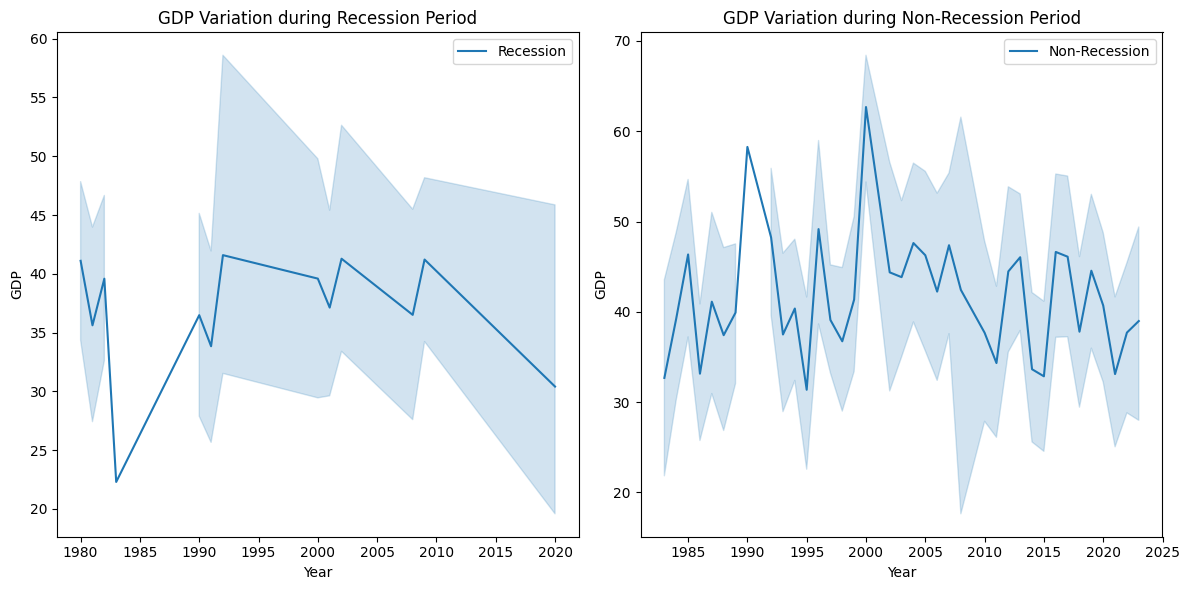

In [ ]:
# Filter the dataset for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Create figure
fig = plt.figure(figsize=(12, 6))

# Create subplots
ax0 = fig.add_subplot(1, 2, 1)  # 1 row, 2 columns, first plot
ax1 = fig.add_subplot(1, 2, 2)  # 1 row, 2 columns, second plot

# Subplot 1: GDP during recession
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0)
ax0.set_xlabel('Year')
ax0.set_ylabel('GDP')
ax0.set_title('GDP Variation during Recession Period')

# Subplot 2: GDP during non-recession
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1)
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.set_title('GDP Variation during Non-Recession Period')

plt.tight_layout()  # Adjust spacing
plt.show()


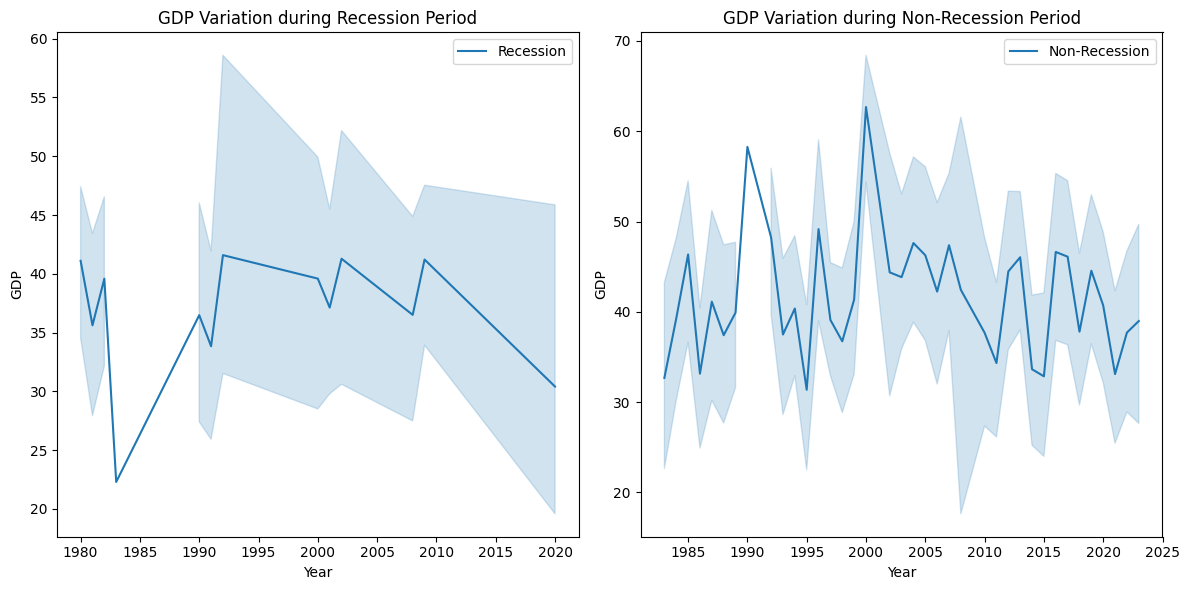

In [ ]:
# [================================== Alternative Method =====================================]
# Create figure with subplots
plt.figure(figsize=(12, 6))

# Subplot 1: GDP during recession
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Recession Period')
plt.legend()

# Subplot 2: GDP during non-recession
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession')
plt.xlabel('Year')
plt.ylabel('GDP')
plt.title('GDP Variation during Non-Recession Period')
plt.legend()

plt.tight_layout()
plt.show()


###TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.

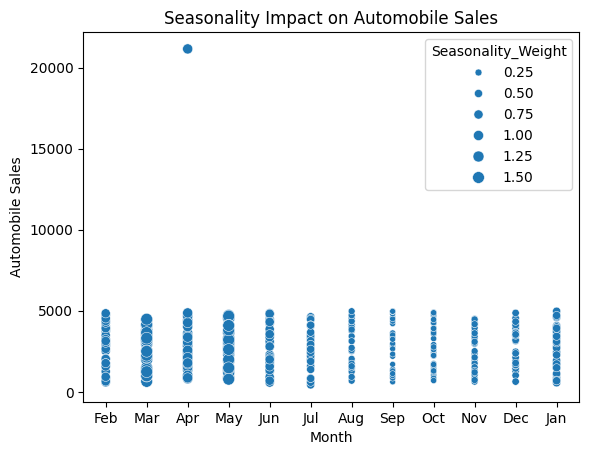

In [ ]:
# Filter the dataset for non-recession years
non_rec_data = df[df['Recession'] == 0]

# Size for bubble effect (based on 'Seasonality_Weight')
size = non_rec_data['Seasonality_Weight']

# Create the scatter plot with bubble effect
sns.scatterplot(data=non_rec_data, x='Month', y='Automobile_Sales', size=size)
plt.xlabel('Month')
plt.ylabel('Automobile Sales')
plt.title('Seasonality Impact on Automobile Sales')

# Show the plot
plt.show()


###TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period?

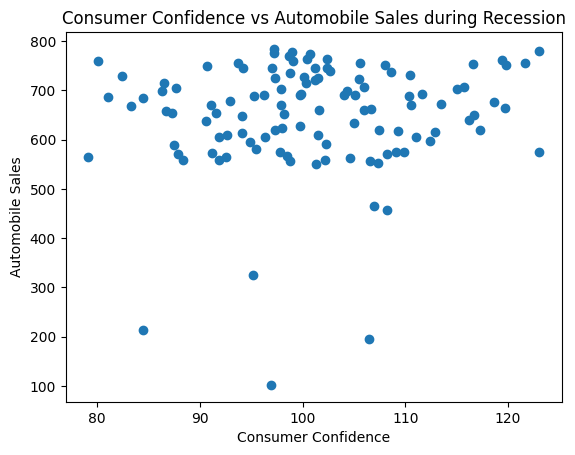

In [ ]:
# Filter the dataset for recession years
rec_data = df[df['Recession'] == 1]

# Create scatter plot for Consumer Confidence vs Automobile Sales during Recession
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])

# Set axis labels and title
plt.xlabel('Consumer Confidence')
plt.ylabel('Automobile Sales')
plt.title('Consumer Confidence vs Automobile Sales during Recession')

plt.show()


###How does the average vehicle price relate to the sales volume during recessions?

Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'

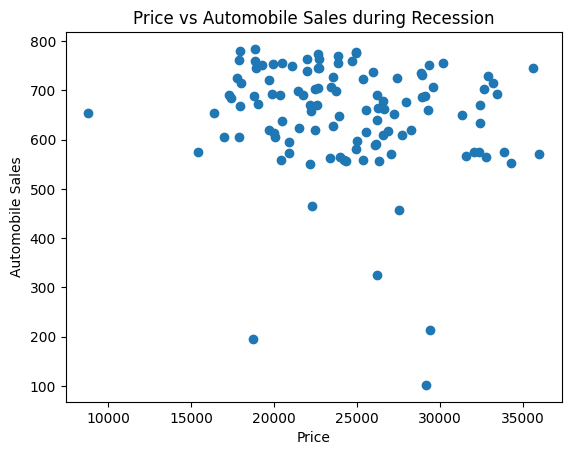

In [ ]:
# Filter the dataset for recession years
rec_data = df[df['Recession'] == 1]

# Create scatter plot for Price vs Automobile Sales during Recession
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'])
plt.xlabel('Price')
plt.ylabel('Automobile Sales')
plt.title('Price vs Automobile Sales during Recession')
plt.show()



###TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.


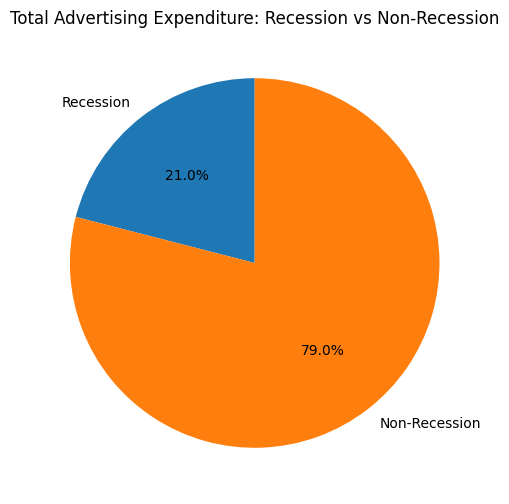

In [ ]:
# Filter the dataset for recession and non-recession years
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()
plt.figure(figsize=(8, 6))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Total Advertising Expenditure: Recession vs Non-Recession')
plt.show()


###TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.

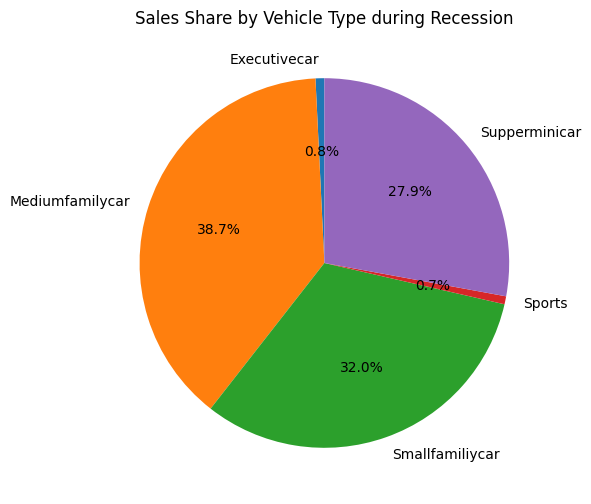

In [ ]:
Rdata = df[df['Recession'] == 1]

# Calculate the sales volume by vehicle type during recessions
VTexpenditure = Rdata.groupby('Vehicle_Type')['Automobile_Sales'].sum()

plt.figure(figsize=(8, 6))
labels = VTexpenditure.index

sizes = VTexpenditure.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

plt.title('Sales Share by Vehicle Type during Recession')
plt.show()

###TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.


<ipython-input-21-6ad459d694db>:3: UserWarning:


The markers list has fewer values (1) than needed (5) and will cycle, which may produce an uninterpretable plot.



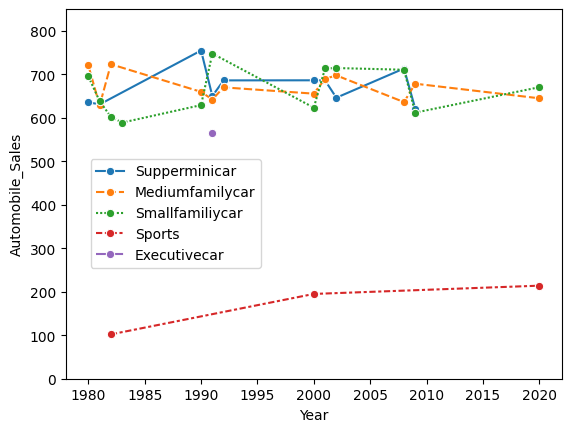

In [ ]:
df_rec = df[df['Recession'] == 1]

sns.lineplot(data=df_rec, x='Year', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0, 850)
plt.legend(loc=(0.05, .3))
plt.show()

###TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period

In [ ]:
import urllib.request
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'

filename = "us-states.json"
urllib.request.urlretrieve(path, filename)

('us-states.json', <http.client.HTTPMessage at 0x7c419fb4d9c0>)

In [ ]:
temp=pd.read_json(filename)
for row in temp["features"]:
    print(row["id"], row["properties"]["name"])

AL Alabama
AK Alaska
AZ Arizona
AR Arkansas
CA California
CO Colorado
CT Connecticut
DE Delaware
FL Florida
GA Georgia
HI Hawaii
ID Idaho
IL Illinois
IN Indiana
IA Iowa
KS Kansas
KY Kentucky
LA Louisiana
ME Maine
MD Maryland
MA Massachusetts
MI Michigan
MN Minnesota
MS Mississippi
MO Missouri
MT Montana
NE Nebraska
NV Nevada
NH New Hampshire
NJ New Jersey
NM New Mexico
NY New York
NC North Carolina
ND North Dakota
OH Ohio
OK Oklahoma
OR Oregon
PA Pennsylvania
RI Rhode Island
SC South Carolina
SD South Dakota
TN Tennessee
TX Texas
UT Utah
VT Vermont
VA Virginia
WA Washington
WV West Virginia
WI Wisconsin
WY Wyoming


###You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth

In [ ]:
us_geo = r"https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json"

temp=df[df["Recession"]==1]

us_map = folium.Map(location=[40.60987815505275, -100.77676139515009], zoom_start=4)

folium.Choropleth(
    geo_data=us_geo,
    data=temp,
    columns=['City', 'Automobile_Sales'],
    key_on='feature.properties.name',
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
).add_to(us_map)

us_map

In [ ]:
!pip install dash

###Task 2.1 - Create a Dash application and give it a meaningful title.

In [56]:
import dash
import pandas as pd
import plotly.express as px
from dash import Dash, dcc, html

# Create the Dash application instance
app = Dash(__name__)

# Title of the application
app.layout = html.Main(
    children=[
        html.H1(
            "Automobile Sales Statistics Dashboard",
            className="mt-8 text-4xl font-bold tracking-tight text-gray-900 sm:text-6xl",
        ),
        # Further layout will be added in subsequent tasks
    ],
    className="flex flex-col items-center",
)


###TASK 2.2: Add drop-down menus to your dashboard with appropriate titles and options

In [57]:
# Dropdown for selecting report type
app.layout.children.append(
    html.Div(
        [
            html.Label("Select Report Type:", className="text-base font-semibold text-gray-900", htmlFor="input-report"),
            dcc.Dropdown(
                options=[
                    {"label": "Yearly Statistics", "value": "Yearly"},
                    {"label": "Recession Period Statistics", "value": "Recession"},
                ],
                value="Yearly",
                id="input-report",
            ),
        ],
        className="mt-4",
    )
)

# Dropdown for selecting year
app.layout.children.append(
    html.Div(
        [
            html.Label("Year:", className="text-base font-semibold text-gray-900", htmlFor="input-year"),
            dcc.Dropdown(
                sorted(df.Year.unique()), value=2005, id="input-year", disabled=True
            ),
        ],
        className="mt-4",
    )
)


###TASK 2.3: Add a division for output display with appropriate id and classname property

In [58]:
# Division for graph output display
app.layout.children.append(
    html.Section(
        [
            dcc.Graph(id="plot-1"),
            dcc.Graph(id="plot-2"),
            dcc.Graph(id="plot-3"),
            dcc.Graph(id="plot-4"),
        ],
        className="flex flex-wrap items-center justify-center",
    )
)


###TASK 2.4: Creating Callbacks; Define the callback function to update the input container based on the selected statistics and the output container

In [59]:
from dash import Input, Output, callback

# Callback to enable/disable year dropdown based on report type selection
@app.callback(Output("input-year", "disabled"), Input("input-report", "value"))
def disable_year(report_value):
    return report_value == "Recession"

# Callback to display graphs based on selected report type and year
@app.callback(
    [
        Output("plot-1", "figure"),
        Output("plot-2", "figure"),
        Output("plot-3", "figure"),
        Output("plot-4", "figure"),
    ],
    [
        Input("input-report", "value"),
        Input("input-year", "value"),
    ]
)
def display_graphs(report_value, entered_year):
    if report_value == "Recession":
        return recession_graphs()
    else:
        return year_graphs(entered_year)


###TASK 2.5: Create and display graphs for Recession Report Statistics

In [60]:
# Function to generate graphs for Recession Report Statistics
def recession_graphs():
    # Line Graph, Avg Sales by year
    fig_line = px.line(
        df_rec[["Year", "Automobile_Sales"]].groupby("Year").mean().reset_index(),
        x="Year",
        y="Automobile_Sales",
        title="Average Automobile Sales by Year during Recession Periods",
        color_discrete_sequence=["#C45A9A"],
    )

    # Bar Graph 1, Avg sales by vehicle type
    bar_df = df_rec[["Vehicle_Type", "Automobile_Sales"]].groupby("Vehicle_Type").mean().reset_index()
    bar_df["Vehicle_Type"] = bar_df["Vehicle_Type"].map(vehicle_type_names)
    fig_bar_1 = px.bar(
        bar_df,
        x="Vehicle_Type",
        y="Automobile_Sales",
        title="Average Automobile Sales by Vehicle Type during Recession Periods",
        color_discrete_sequence=["#C45A9A"],
    )

    # Pie chart, Advertising expenditure by vehicle type
    pie_df = df_rec[["Vehicle_Type", "Advertising_Expenditure"]].groupby("Vehicle_Type").sum().reset_index()
    pie_df["Vehicle_Type"] = pie_df["Vehicle_Type"].map(vehicle_type_names)
    fig_pie = px.pie(
        pie_df,
        values="Advertising_Expenditure",
        names="Vehicle_Type",
        title="Total Advertising Expenditure by Vehicle Type during Recession Periods",
    )

    # Bar Graph 2, Sales per vehicle type by unemployment rate
    bar2_df = df_rec[["unemployment_rate", "Vehicle_Type", "Automobile_Sales"]].groupby(["Vehicle_Type", "unemployment_rate"]).sum().reset_index()
    fig_bar_2 = px.bar(
        bar2_df,
        x="unemployment_rate",
        y="Automobile_Sales",
        color="Vehicle_Type",
        title="Automobile Sales by Vehicle Type Per Unemployment Rate during Recession Periods",
    )

    return [fig_line, fig_bar_1, fig_pie, fig_bar_2]


###TASK 2.6: Create and display graphs for Yearly Report Statistics

In [61]:
# Function to generate graphs for Yearly Report Statistics
def year_graphs(entered_year):
    # Filter data for the selected year
    df_year = df[df["Year"] == entered_year]

    # Line Graph for average sales per year
    fig_line = px.line(
        df[["Year", "Automobile_Sales"]].groupby("Year").mean(),
        y="Automobile_Sales",
        title="Yearly Average Automobile Sales",
    )

    # Line Graph for total monthly sales
    fig_line_2 = px.line(
        df_year, x="Month", y="Automobile_Sales", title=f"Total Automobile Sales per Month in {entered_year}",
    )

    # Bar chart for monthly average sales by vehicle type
    df_bar = df_year.groupby("Vehicle_Type").sum().reset_index()
    df_bar["Automobile_Sales"] = df_bar["Automobile_Sales"] / 12  # Monthly average
    df_bar["Vehicle_Type"] = df_bar["Vehicle_Type"].map(vehicle_type_names)
    fig_bar = px.bar(
        df_bar,
        x="Vehicle_Type",
        y="Automobile_Sales",
        title=f"Average Monthly Automobile Sales by Vehicle Type in {entered_year}",
    )

    # Pie chart for advertising expenditure by vehicle type
    pie_df = df_year.groupby("Vehicle_Type").sum().reset_index()
    pie_df["Vehicle_Type"] = pie_df["Vehicle_Type"].map(vehicle_type_names)
    fig_pie = px.pie(
        pie_df,
        values="Advertising_Expenditure",
        names="Vehicle_Type",
        title=f"Total Advertising Expenditure by Vehicle Type in {entered_year}",
    )

    return [fig_line, fig_line_2, fig_bar, fig_pie]


In [62]:
if __name__ == "__main__":
    app.run_server()

<IPython.core.display.Javascript object>